# Loading Pystare and Modules

In [1]:
import sys
# sys.path.insert(1, '/home/griessbaum/Dropbox/UCSB/STARE_Project/STARE_build/src/')
sys.path.insert(1, '/home/mrilee/workspace/STARE-BUILD/')
import pystare

In [2]:
import numpy
import shapely.geometry
import pandas
import geopandas
import matplotlib.pyplot as plt
import shapely.wkt
from pyhdf.SD import SD

# Numpy tests

In [3]:
lat = numpy.array([30, 45, 60], dtype=numpy.double)
lon = numpy.array([45, 60, 10], dtype=numpy.double)

indices = pystare.from_latlon(lat, lon, 14)
indices

array([4151504989081014894, 4161865161846704590, 3643626718498217166])

In [4]:
lat, lon = pystare.to_latlon(indices)
lat, lon, level = pystare.to_latlonlevel(indices)
print(lat)
print(lon)
print(level)

[30.00000012 45.00000003 59.99999986]
[44.99999991 60.00000013  9.9999999 ]
[14 14 14]


In [5]:
area = pystare.to_area(indices)
area

array([5.41567334e-09, 5.46741649e-09, 4.98636938e-09])

In [6]:
intersected = pystare.intersect(indices, indices, multiresolution=False)
print(indices)
print(intersected)
set(indices) == set(intersected)

[4151504989081014894 4161865161846704590 3643626718498217166]
[3643626718058512398 4151504988050292750 4161865159985332238]


False

# Shapely test (Points)

In [7]:
point = shapely.geometry.Point(105.08669022192834, 33.85639928169076)
index_value = pystare.from_shapely(point, 12)
print(index_value)
print(pystare.to_latlon(index_value))

[702018252248373324]
(array([33.85639935]), array([105.08669033]))


# Shapely test (Polygon)

In [8]:
polygon = shapely.geometry.Polygon([[102.1, 33.1],  
                                    [101.1, 35.1], 
                                    [102.1, 35.1], 
                                    [104.1, 33.1], 
                                    [102.1, 33.1]])

range_indices = pystare.from_polygon(polygon, resolution=12)

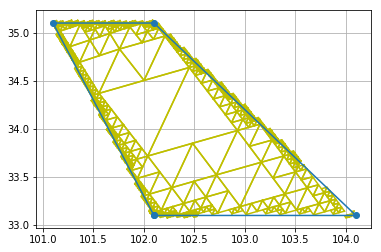

In [9]:
fig, ax = plt.subplots()
ax.grid(True)

triangles = pystare.to_trixels(range_indices)
for triangle in triangles:
    ax.plot(*triangle.exterior.xy, color='y')
ax.plot(*polygon.exterior.xy, marker='o')

In [10]:
geom = shapely.wkt.loads('''POLYGON ((61.21081709172574 35.65007233330923, 
                                      62.23065148300589 35.27066396742229, 
                                      71.34813113799026 38.25890534113216, 
                                      72.92002485544447 36.72000702569632, 
                                      69.31776411324256 31.90141225842444, 
                                      68.92667687365767 31.62018911389207, 
                                      66.34647260932442 29.88794342703618, 
                                      65.04686201361611 29.56003062592809, 
                                      64.14800215033125 29.34081920014597, 
                                      63.55026085801117 29.46833079682617, 
                                      61.69931440618083 31.37950613049267, 
                                      60.96370039250601 33.52883230237626, 
                                      60.80319339380745 34.40410187431986, 
                                      61.21081709172574 35.65007233330923))''')
index_ranges = pystare.from_polygon(geom)

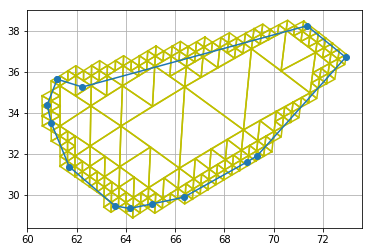

In [11]:
fig, ax = plt.subplots()
ax.grid(True)
triangles = pystare.to_trixels(index_ranges)
for triangle in triangles:
    ax.plot(*triangle.exterior.xy, color='y')
ax.plot(*geom.exterior.coords.xy, marker='o')

# Geopandas Test

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
africa = world.set_index('continent').loc['Africa']
africa.sort_values(by='name', inplace=True)
africa.head()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,40969443,Algeria,DZA,609400.0,POLYGON ((-8.684399786809053 27.39574412689601...
Africa,29310273,Angola,AGO,189000.0,(POLYGON ((12.99551720546518 -4.78110320396188...
Africa,11038805,Benin,BEN,24310.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
Africa,2214858,Botswana,BWA,35900.0,POLYGON ((29.43218834810904 -22.09131275806759...
Africa,20107509,Burkina Faso,BFA,32990.0,POLYGON ((-5.404341599946974 10.37073680260915...


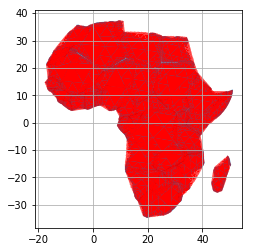

In [13]:
fig, ax = plt.subplots()
ax.grid(True)

africa.plot(ax=ax)

africa = africa.assign(stare=pystare.from_geopandas(africa, resolution=10))
africa = africa.assign(trixels=pystare.to_trixels_series(africa['stare']))
africa.set_geometry('trixels').plot(color='red', ax=ax)

In [14]:
africa.sort_values(by='name').head()

,pop_est,name,iso_a3,gdp_md_est,geometry,stare,trixels
continent,,,,,,,
Africa,40969443,Algeria,DZA,609400.0,POLYGON ((-8.684399786809053 27.39574412689601...,"[4485585228861014020, 4492340628302069764, 422...","(POLYGON ((0 35.26439016892547, -4.26668296200..."
Africa,29310273,Angola,AGO,189000.0,(POLYGON ((12.99551720546518 -4.78110320396188...,"[4464281091561226248, 4464659323561181192, 446...",(POLYGON ((12.42307319064818 -4.71500158692025...
Africa,11038805,Benin,BEN,24310.0,"POLYGON ((2.691701694356254 6.258817246928629,...","[4481363104210354183, 4481398288582443015, 448...","(POLYGON ((2.345813620539126 10.2280639936318,..."
Africa,2214858,Botswana,BWA,35900.0,POLYGON ((29.43218834810904 -22.09131275806759...,"[21392098230009861, 21955048183431173, 2589569...",(POLYGON ((24.29559100067425 -19.4708859004967...
Africa,20107509,Burkina Faso,BFA,32990.0,POLYGON ((-5.404341599946974 10.37073680260915...,"[4470526317606993926, 4470667055095349254, 447...",(POLYGON ((-5.398502660912072 11.0963657172183...


# Intersecting with Modis data

In [16]:
# Get the granule at: 
# https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/6/MOD09/2019/317/MOD09.A2019317.0815.006.2019319020759.hdf
file_path = 'MOD09.A2019317.0815.006.2019319020759.hdf'
hdf = SD(file_path)
lat = hdf.select('Latitude').get().flatten()[0:1354]
lon = hdf.select('Longitude').get().flatten()[0:1354]
band4 = hdf.select('1km Surface Reflectance Band 4').get().flatten()[0:1354]
modis = pandas.DataFrame({'lat': lat, 'lon': lon, 'band4': band4})
modis = geopandas.GeoDataFrame(modis, geometry=geopandas.points_from_xy(modis.lon, modis.lat))

modis['stare'] = pystare.from_geopandas(modis, 12)
modis.head()

,lat,lon,band4,geometry,stare
0,13.981338,24.933973,1848,POINT (24.93397331237793 13.98133754730225),4528191884642127404
1,13.976474,24.978500,1799,POINT (24.97850036621094 13.97647380828857),4528191929150335436
2,13.971599,25.023054,1943,POINT (25.0230541229248 13.97159862518311),4528192141154377164
3,13.966847,25.066420,1925,POINT (25.06641960144043 13.96684741973877),4528191461944221900
4,13.961843,25.111959,1561,POINT (25.11195945739746 13.96184349060059),4528191340451727692


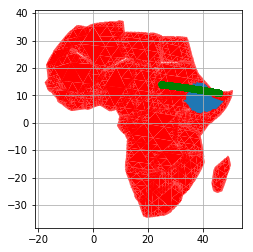

In [17]:
fig, ax = plt.subplots()
ax.grid(True)

africa.set_geometry('trixels').plot(color='red', ax=ax, linewidth=10)
africa.set_index('name').loc[['Ethiopia']].plot(ax=ax)
modis.plot(ax=ax, color='green')

In [18]:
pystare.intersect(africa.set_index('name').loc['Djibouti'].stare, modis.stare, multiresolution=False)

array([4111933004073402380, 4111933278951309324, 4111933622548693004,
       4111933691268169740, 4506136338134728716, 4506136922250280972,
       4506136990969757708, 4506137025329496076, 4506137094048972812,
       4506156679099842572, 4506156713459580940, 4506156816538796044,
       4506156919618011148, 4506156953977749516, 4506159977634725900,
       4506160011994464268, 4506160115073679372, 4506160183793156108,
       4506160218152894476, 4506164925437050892, 4506164959796789260,
       4506165028516265996, 4506165062876004364, 4506165131595481100,
       4506167261899259916, 4506167605496643596, 4506167639856381964,
       4506167811655073804, 4506167846014812172, 4506167914734288908,
       4506215090655068172, 4506215502971928588, 4506216052727742476,
       4506216155806957580, 4506216258886172684, 4506216293245911052,
       4506216327605649420, 4506230896134717452, 4506230999213932556,
       4506231136652886028, 4506231171012624396, 4506232648481374220,
       4506232751560

In [19]:
pystare.intersect(africa.set_index('name').loc['Ethiopia'].stare, modis.stare, multiresolution=False)

array([4111930220934594572, 4111930324013809676, 4111930461452763148,
       4111933004073402380, 4111933278951309324, 4111933622548693004,
       4111933691268169740, 4111933863066861580, 4111934275383721996,
       4111940425776889868, 4111958017962934284, 4111958361560317964,
       4111958430279794700, 4113776885073182732, 4113776919432921100,
       4113778328182194188, 4113778706139316236, 4113779427693821964,
       4113781248759955468, 4113781832875507724, 4113781867235246092,
       4113782863667658764, 4113783035466350604, 4113845123513581580,
       4113845260952535052, 4113845982507040780, 4113862990577532940,
       4113863196735963148, 4113866082953986060, 4113866220392939532,
       4113866460911108108, 4113866632709799948, 4113870137403113484,
       4113874466730147852, 4113874707248316428, 4113874741608054796,
       4113876665753403404, 4113877765265031180, 4113878005783199756,
       4113878177581891596, 4113893983061540876, 4113894910774476812,
       4113895082573

In [20]:
pystare.intersect(africa.set_index('name').loc['Angola'].stare, modis.stare, multiresolution=False)

array([], dtype=int64)

In [21]:
for country in africa.itertuples():    
    intersected = numpy.full([200000], -1, dtype=numpy.int64)
    pystare._intersect(modis.stare, country.stare, intersected)            